In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pm4py
import pickle
import itertools
import seed_to_harvest as sth
import geopandas as gpd
import os

In [198]:
#Dir path
#Case='NorthDakota'
Case='Colorado'
sites_pth = 'Data/'+Case+'/sites/'
cdl_pth = 'Data/'+Case+'/cdl/'
season_pth = 'Data/'+Case+'/season/'

sid=158
ts=pd.read_hdf(sites_pth+f'/Site{sid:03}_NBARint.h5')
season=pd.read_hdf(season_pth+f'/Site{sid:03}_season_day.h5')

In [181]:
site_names = os.listdir(sites_pth)

In [182]:
sites_pth+site_names[0]

'Data/NorthDakota/sites/Site000_NBARint.h5'

C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\1827980668.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ts[f'{yt}'].plot()


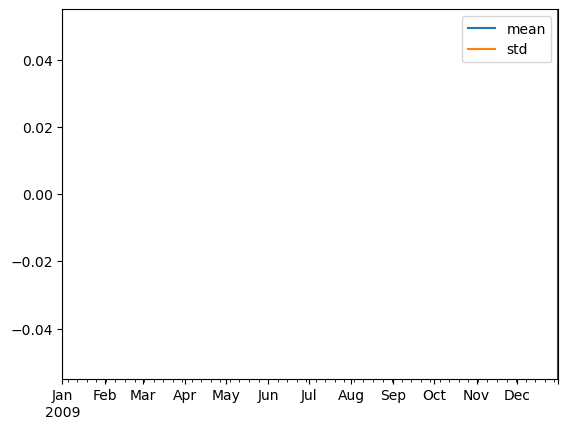

In [199]:
yt=2009
start_season = season.loc[int(yt)]['start_season']
end_season = season.loc[int(yt)]['end_season']
ts[f'{yt}'].plot()
plt.axvline(start_season, color='r')
plt.axvline(end_season, color='r')

In [185]:
site_names = os.listdir(sites_pth)
cdl_names = os.listdir(cdl_pth)
season_names = os.listdir(season_pth)
location=np.load('Data/'+Case+'/masklayers/wgscenterlist.npy')

In [191]:
i=0
ts=pd.read_hdf(sites_pth+site_names[i])#f'/Site{sid:03}_NBARint.h5')
cdl=pd.read_hdf(cdl_pth+cdl_names[i])#f'/Site{sid:03}_cdl.h5')
season=pd.read_hdf(season_pth+season_names[i])#f'/Site{sid:03}_season_day.h5')
loc=location[i]

In [ ]:
timelog, warnings = sth.eventtime_MACD(ts, season, cdl, sid, loc, start_year=start_year)

In [217]:
#timelog=pd.read_hdf('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_148sites_240129_df.h5')
timelog=pd.read_hdf('C:/Users/Vito/Documents/Seed_to_harvest_process_monitoring/Event_log/log_'+Case+'_240524_df.h5')

In [213]:
subset = timelog[timelog['SiteID'].isin([113, 158])]
subset

,Activity,Timestamp,Time_uncertainty,CaseID,Crop,SiteID,WGS84_lon_lat,County,State,Country,NDVI_range,num_valid_est,Multiple_crop


In [219]:
site_names = os.listdir(sites_pth)
num_sites=len(site_names)
num_sites

160

In [218]:
all_cases=np.unique(timelog['CaseID'])

In [220]:
no_valid_cases=[]
for i in range(num_sites):
    for yt in np.arange(2008,2023):
        if f'{i:04}_{yt}' not in all_cases:
            no_valid_cases.append(f'{i:04}_{yt}')
len(no_valid_cases)

61

In [221]:
def warn_mark(i,n):
    return f"{i:04}_{n+2007}"
def warn_site_years(Lst):
    threshold=np.nonzero(np.array(Lst[1])<0.75)[0]
    return list(map(lambda x: warn_mark(Lst[0], x), threshold))

with open(cdl_pth+"/ConsistencyPerc", "rb") as fp:   # Unpickling
    site_consistencyL = pickle.load(fp)

CaseID_anom=list(map(warn_site_years, enumerate(site_consistencyL)))

flat_CaseID_anom = list(itertools.chain.from_iterable(CaseID_anom))
invalid_due_to_multicrop=[case in flat_CaseID_anom for case in no_valid_cases]
sum(invalid_due_to_multicrop)
no_valid_cases=[no_valid_cases[i] for i in range(len(no_valid_cases)) if not invalid_due_to_multicrop[i]]
len(no_valid_cases)

25

In [222]:
crop_id=[ 'Unidentify','Corn','Cotton','Rice','Sorghum','Soybeans','Sunflower','','','','Peanuts','Tobacco','Sweet Corn','Pop or Orn Corn','Mint','','','','','','','Barley','Durum Wheat','Spring Wheat','Winter Wheat','Other Small Grains','Dbl Crop WinWht/Soybeans','Rye','Oats','Millet','Speltz','Canola','Flaxseed','Safflower','Rape Seed','Mustard','Alfalfa','Other Hay/Non Alfalfa','Camelina','Buckwheat','','Sugarbeets','Dry Beans','Potatoes','Other Crops','Sugarcane','Sweet Potatoes','Misc Vegs & Fruits','Watermelons','Onions','Cucumbers','Chick Peas','Lentils','Peas','Tomatoes','Caneberries','Hops','Herbs','Clover/Wildflowers','Sod/Grass Seed','Switchgrass','Fallow/Idle Cropland','Pasture/Grass','Forest','Shrubland','Barren','Cherries','Peaches','Apples','Grapes','Christmas Trees','Other Tree Crops','Citrus','Pecans','Almonds','Walnuts','Pears','','','','Clouds/No Data','Developed','Water','','','','Wetlands','Nonag/Undefined','','','','Aquaculture','','','','','','','','','','','','','','','','','','','Open Water','Perennial Ice/Snow','','','','','','','','','Developed/Open Space','Developed/Low Intensity','Developed/Med Intensity','Developed/High Intensity','','','','','','','Barren','','','','','','','','','','Deciduous Forest','Evergreen Forest','Mixed Forest','','','','','','','','','Shrubland','','','','','','','','','','','','','','','','','','','','','','','','Grassland/Pasture','','','','','','','','','','','','','','Woody Wetlands','','','','','Herbaceous Wetlands','','','','','','','','','Pistachios','Triticale','Carrots','Asparagus','Garlic','Cantaloupes','Prunes','Olives','Oranges','Honeydew Melons','Broccoli','Avocados','Peppers','Pomegranates','Nectarines','Greens','Plums','Strawberries','Squash','Apricots','Vetch','Dbl Crop WinWht/Corn','Dbl Crop Oats/Corn','Lettuce','Dbl Crop Triticale/Corn','Pumpkins','Dbl Crop Lettuce/Durum Wht','Dbl Crop Lettuce/Cantaloupe','Dbl Crop Lettuce/Cotton','Dbl Crop Lettuce/Barley','Dbl Crop Durum Wht/Sorghum','Dbl Crop Barley/Sorghum','Dbl Crop WinWht/Sorghum','Dbl Crop Barley/Corn','Dbl Crop WinWht/Cotton','Dbl Crop Soybeans/Cotton','Dbl Crop Soybeans/Oats','Dbl Crop Corn/Soybeans','Blueberries','Cabbage','Cauliflower','Celery','Radishes','Turnips','Eggplants','Gourds','Cranberries','','','','Dbl Crop Barley/Soybeans']
CropID=[]
for i in no_valid_cases:
    sid=int(i[:4])
    cdl=pd.read_hdf(cdl_pth+f'/Site{sid:03}_cdl.h5')
    cid=cdl.loc[int(i[-4:])]
    CropID.append(crop_id[int(cid)])


In [223]:
df = pd.DataFrame({'no_valid_cases': no_valid_cases})

# Extract the first 4 characters into a new column
df['site'] = df['no_valid_cases'].str[:4]

# Extract the last 4 characters into a new column
df['year'] = df['no_valid_cases'].str[-4:]
df['CropID']=CropID
df.drop('no_valid_cases', axis=1, inplace=True)


C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\3033299473.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(crops, rotation=45)


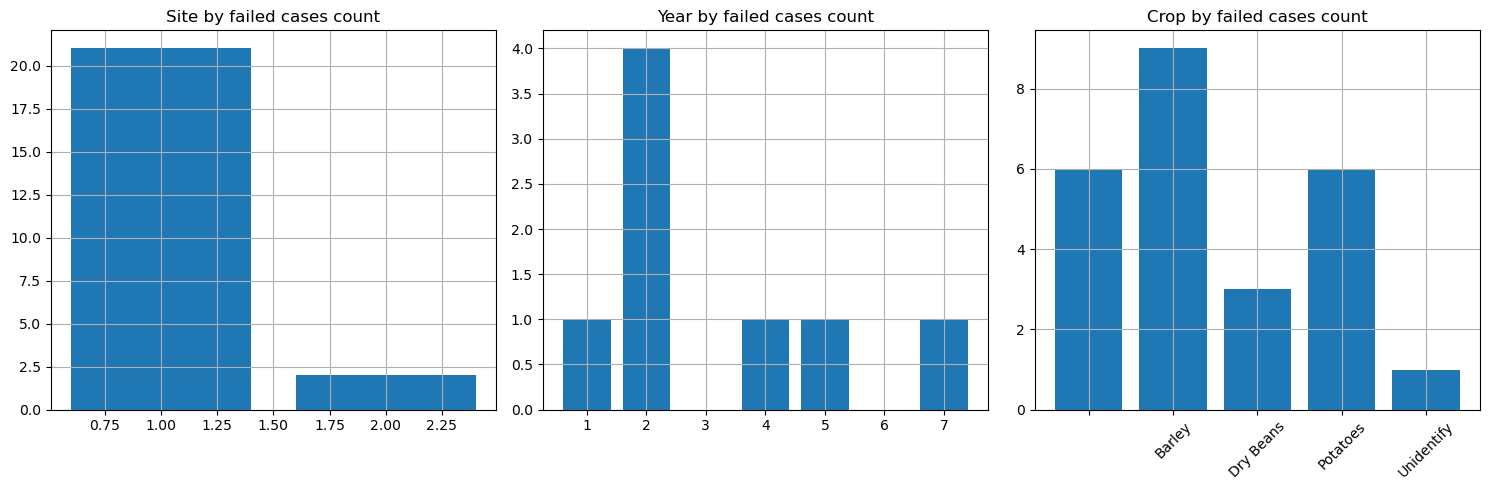

In [224]:
sites,site_failed_count=np.unique(df['site'], return_counts=True) 
years,year_failed_count=np.unique(df['year'], return_counts=True)
crops,crop_failed_count=np.unique(df['CropID'], return_counts=True) 

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(np.unique(site_failed_count, return_counts=True)[0],np.unique(site_failed_count, return_counts=True)[1])
ax[0].set_title('Site by failed cases count')
ax[0].grid()


ax[1].bar(np.unique(year_failed_count, return_counts=True)[0],np.unique(year_failed_count, return_counts=True)[1])
ax[1].set_title('Year by failed cases count')
ax[1].grid()

ax[2].bar(crops,crop_failed_count)
ax[2].set_title('Crop by failed cases count')
ax[2].set_xticklabels(crops, rotation=45)
ax[2].grid()
plt.tight_layout()
plt.show()

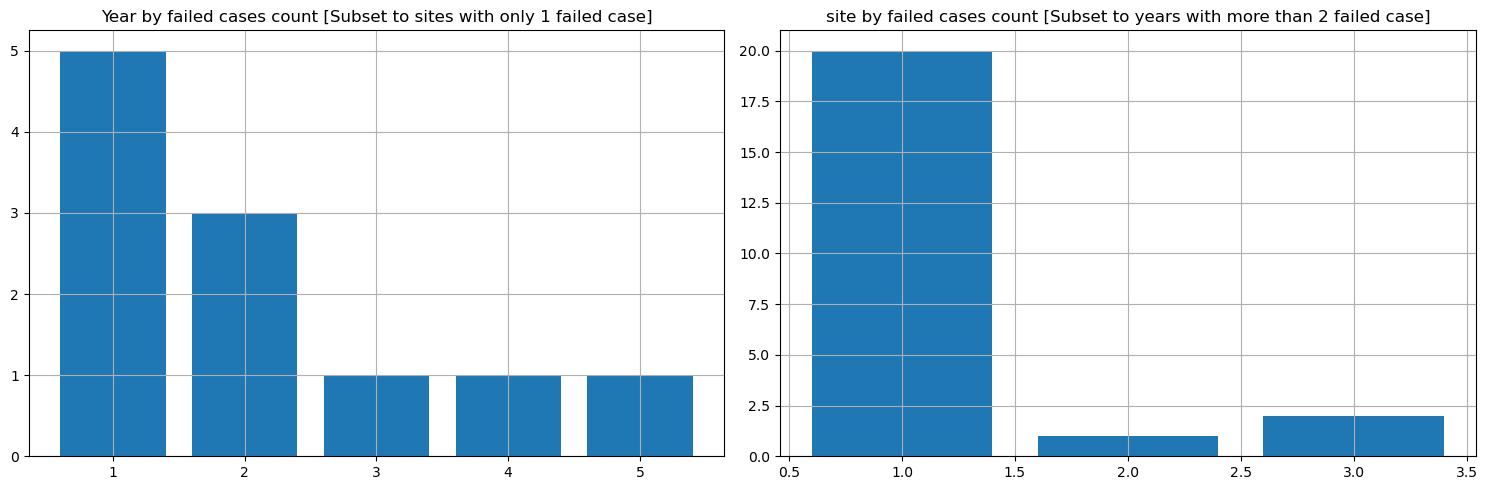

In [125]:
sites,site_failed_count=np.unique(df['site'], return_counts=True) 
years,year_failed_count=np.unique(df['year'], return_counts=True) 
subset_df = df[df['site'].isin(sites[site_failed_count==1])]
subset_df.reset_index(drop=True, inplace=True)
years,year_failed_count=np.unique(subset_df['year'], return_counts=True) 

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(np.unique(year_failed_count, return_counts=True)[0],np.unique(year_failed_count, return_counts=True)[1])
ax[0].set_title('Year by failed cases count [Subset to sites with only 1 failed case]')
ax[0].grid()

sites,site_failed_count=np.unique(df['site'], return_counts=True) 
years,year_failed_count=np.unique(df['year'], return_counts=True) 
subset_df = df[df['year'].isin(years[year_failed_count>2])]
subset_df.reset_index(drop=True, inplace=True)
site,site_failed_count=np.unique(subset_df['site'], return_counts=True) 

ax[1].bar(np.unique(site_failed_count, return_counts=True)[0],np.unique(site_failed_count, return_counts=True)[1])
ax[1].set_title('site by failed cases count [Subset to years with more than 2 failed case]')
ax[1].grid()
plt.tight_layout()
plt.show()

In [ ]:
#check time series integrity?if there is a lot of missing data
#check shape?
#check relationship with crop?

In [203]:
shapefile_path = 'Data/'+Case+'/masklayers/site_mask.shp'
#= 'C:/Users/Vito/Documents/p1/masklayers/potato_flt_mask.shp'
gdf = gpd.read_file(shapefile_path)

#int_sites=[int(i) for i in np.unique(df['site'])]
#sites,site_failed_count=np.unique(df['site'], return_counts=True)

#subset_gdf = gdf.iloc[int_sites]
subset_gdf = gdf.iloc[158]
subset_gdf.reset_index(drop=True, inplace=True)
subset_gdf['count']=site_failed_count

C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\2364619463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_gdf['count']=site_failed_count
C:\Users\Vito\AppData\Local\Temp\ipykernel_22188\2364619463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_gdf['count']=site_failed_count


In [205]:
gdf.iloc[113]

VALUE                                                     1.0
area                                              1042602.212
area2                                             1042602.212
geometry    POLYGON ((-874499.892563198 1675108.5148153626...
Name: 113, dtype: object

In [ ]:
ax=subset_gdf.plot(column=subset_gdf['count'],cmap='magma')

# Add title and labels
plt.title('Sites with failed cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=0, vmax=max(site_failed_count)))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)
# Show the plot
plt.show()

In [ ]:

#source usda field crops usual planting and harvesting --idaho
#https://downloads.usda.library.cornell.edu/usda-esmis/files/vm40xr56k/dv13zw65p/w9505297d/planting-10-29-2010.pdf
potato_usual=[[pd.Timestamp(2009, 4, 6).dayofyear,pd.Timestamp(2009, 6, 9).dayofyear]
              ,[pd.Timestamp(2009, 8, 15).dayofyear,pd.Timestamp(2009, 10, 27).dayofyear]]

alfalfa_usual=[[0,0]
               ,[pd.Timestamp(2009, 5, 22).dayofyear,pd.Timestamp(2009, 10, 20).dayofyear]]

sugarbeets_usual=[[pd.Timestamp(2009, 3, 24).dayofyear,pd.Timestamp(2009, 5, 5).dayofyear]
                  ,[pd.Timestamp(2009, 9, 15).dayofyear,pd.Timestamp(2009, 11, 10).dayofyear]]

springwheat_usual=[[pd.Timestamp(2009, 3, 21).dayofyear,pd.Timestamp(2009, 5, 26).dayofyear]
                   ,[pd.Timestamp(2009, 8, 4).dayofyear,pd.Timestamp(2009, 9, 29).dayofyear]]

winterwheat_usual=[[pd.Timestamp(2008, 9, 8).dayofyear,pd.Timestamp(2008, 11, 3).dayofyear]
                   ,[pd.Timestamp(2009, 7, 23).dayofyear,pd.Timestamp(2009, 9, 14).dayofyear]]

In [ ]:

timelog['Day_of_Year'] = timelog['Timestamp'].dt.dayofyear

crops = ['Potatoes', 'Spring Wheat', 'Sugarbeets']
usual = [potato_usual, springwheat_usual, sugarbeets_usual]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
ax=ax.flatten()

for i, crop in enumerate(crops):
    crop_df = timelog[timelog['Multiple_crop']==0][timelog[timelog['Multiple_crop']==0]['Crop'] == crop]
    ax[i].boxplot([crop_df[crop_df['Activity'] == activity]['Day_of_Year'] for activity in ['Emergence', 'Maturity', 'Senescence', 'Dormancy']], labels=['Emergence', 'Maturity', 'Senescence', 'Dormancy'])
    ax[i].hlines(usual[i][0], 0.5, 1.5, ls='--', lw=1.5, color='g', label='usual planting')
    ax[i].hlines(usual[i][1], 3.5, 4.5, ls='--', lw=1.5, color='r', label='usual harvesting')
    ax[i].set_title(f'{crop}',  fontsize=18)
    ax[i].tick_params(axis='x', labelsize=16)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
ax[0].set_ylabel('Day of Year', fontsize=18)
ax[1].set_xlabel('Activity',  fontsize=18)
ax[0].legend()
 

plt.suptitle('Result distribution with usual planting and harvesting dates',  fontsize=24)
plt.tight_layout()
plt.savefig('Result/boxplot_3crop.pdf', format='pdf')
plt.show()
